In [ ]:
#Problem 1

In [5]:
from sympy import *
x = symbols('x')
diff((sin(x) + 1) ** sin(cos(x)), x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [6]:
def function(x):
    values = (sin(x) + 1) ** sin(cos(x))
    return values

In [7]:
def function_difference(x):
    diff = (-log(sin(x) + 1) * sin(x) * cos(cos(x)) + sin(cos(x)) * cos(x) / (sin(x) + 1)) * (sin(x) + 1) ** sin(cos(x))
    return diff

In [8]:
import numpy as np
cvec = np.linspace(-np.pi, np.pi, 100)
f = np.array([function(x) for x in cvec])
f_prime = np.array([function_difference(x) for x in cvec])

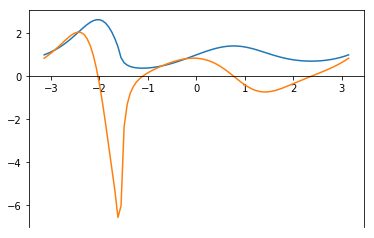

In [10]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f)
plt.plot(cvec, f_prime)
plt.show()

In [11]:
#Problem 2

In [12]:
def forward_1(f, x, h):
    forward_vals_1 = (f(x + h) - f(x)) / h
    return forward_vals_1
def forward_2(f, x, h):
    forward_vals_2 = (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
    return forward_vals_2
def backward_1(f, x, h):
    backward_vals_1 = (f(x) - f(x - h)) / h
    return backward_vals_1
def backward_2(f, x, h):
    backward_vals_2 = (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)
    return backward_vals_2
def centered_1(f, x, h):
    centered_vals_1 = (f(x + h) - f(x - h)) / (2 * h)
    return centered_vals_1
def centered_2(f, x, h):
    centered_vals_2 = (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
    return centered_vals_2

In [13]:
g = 10 ** (-2)
f1 = np.array([forward_1(function, x, g) for x in cvec])
f2 = np.array([forward_2(function, x, g) for x in cvec])
b1 = np.array([backward_1(function, x, g) for x in cvec])
b2 = np.array([backward_2(function, x, g) for x in cvec])
c1 = np.array([centered_1(function, x, g) for x in cvec])
c2 = np.array([centered_2(function, x, g) for x in cvec])

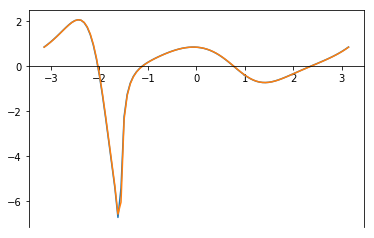

In [14]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f1)
plt.plot(cvec, f_prime)
plt.show()

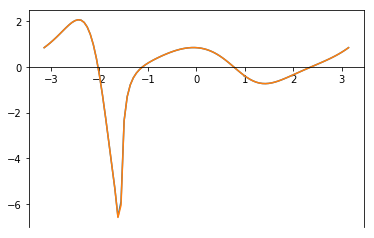

In [15]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f2)
plt.plot(cvec, f_prime)
plt.show()

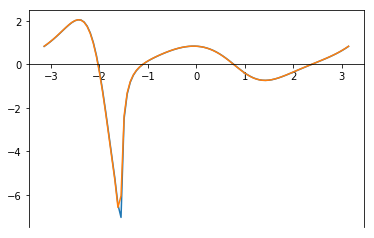

In [16]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, b1)
plt.plot(cvec, f_prime)
plt.show()

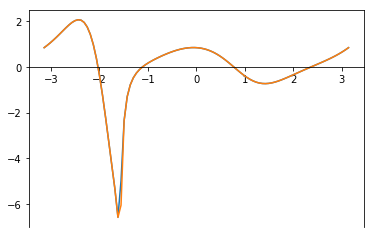

In [17]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, b2)
plt.plot(cvec, f_prime)
plt.show()

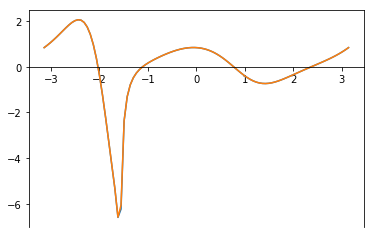

In [18]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, c1)
plt.plot(cvec, f_prime)
plt.show()

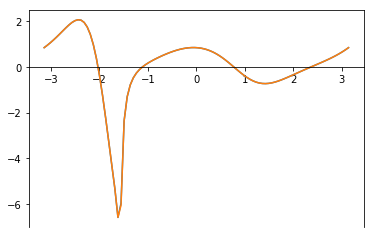

In [19]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, c2)
plt.plot(cvec, f_prime)
plt.show()

In [20]:
#Problem 3

In [21]:
x0 = np.pi
f0 = function_difference(x0)
vec = np.logspace(-8, 0, 9)

In [22]:
def error_array(f, x, h):
    appro_d = np.array([f(function, x, h) for h in vec])
    abs_error = abs(appro_d - f0)
    return abs_error

In [23]:
forward_1_error = error_array(forward_1, x0, g)
forward_2_error = error_array(forward_2, x0, g)
backward_1_error = error_array(backward_1, x0, g)
backward_2_error = error_array(backward_2, x0, g)
centered_1_error = error_array(centered_1, x0 ,g)
centered_2_error = error_array(centered_2, x0, g)

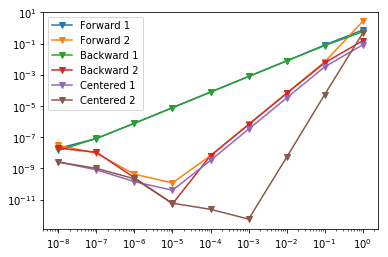

In [24]:
plt.loglog(vec, forward_1_error, marker = 'v')
plt.loglog(vec, forward_2_error, marker = 'v')
plt.loglog(vec, backward_1_error, marker = 'v')
plt.loglog(vec, backward_2_error, marker = 'v')
plt.loglog(vec, centered_1_error, marker = 'v')
plt.loglog(vec, centered_2_error, marker = 'v')
plt.legend(['Forward 1', 'Forward 2', 'Backward 1', 'Backward 2', 'Centered 1', 'Centered 2'])

In [ ]:
#Problem 4

In [101]:
def x_c(alpha, beta):
    x_coordinate = 500 * tan(beta) / (tan(beta) - tan(alpha))
    return x_coordinate
def y_c(alpha, beta):
    y_coordinate = 500 * tan(beta) * tan(alpha) / (tan(beta) - tan(alpha))
    return y_coordinate   

In [102]:
plane = np.load('plane.npy')
get_t = []
get_alpha = []
get_beta = []
for t in range(len(plane)):
    get_t.append(plane[t][0])
    a = np.deg2rad(plane[t][1])
    b = np.deg2rad(plane[t][2])
    get_alpha.append(a)
    get_beta.append(b)

In [103]:
x = list(map(x_c, get_alpha, get_beta))
y = list(map(y_c, get_alpha, get_beta))

In [104]:
def forward(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i]) / 1
    y_prime = (y[i + 1] - y[i]) / 1
    return [x_prime, y_prime]

In [105]:
def backward(t):
    i = t - 7
    x_prime = (x[i] - x[i - 1]) / 1
    y_prime = (y[i] - y[i - 1]) / 1
    return [x_prime, y_prime]

In [106]:
def centered(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i - 1]) / 2
    y_prime = (y[i + 1] - y[i - 1]) / 2
    return [x_prime, y_prime]

In [107]:
def get_speed(f, t):
    a = f(t)
    s = (a[0] ** 2 + a[1] ** 2) ** 0.5
    return s

In [108]:
import pandas as pd
speed = pd.DataFrame()
speed_for = pd.DataFrame([(7, get_speed(forward, 7))])
speed = speed.append(speed_for)

In [109]:
for t in get_t:
    if t > 7 and t < 14 :
        i = t - 7
        speed_cen = pd.DataFrame([(int(t), get_speed(centered, int(t)))])
        speed = speed.append(speed_cen)

In [110]:
speed_back = pd.DataFrame([(14, get_speed(backward, 14))])
speed = speed.append(speed_back)

In [111]:
speed

,0,1
0,7,46.4242006221354
0,8,47.0010393809513
0,9,48.9988051403671
0,10,50.0994416296545
0,11,48.2903508382033
0,12,51.5645590492716
0,13,53.9230335450556
0,14,51.5148005696385


In [ ]:
#Problem 5

In [133]:
def eg_f(x, y):
    f1 = [x ** 2]
    f2 = [x ** 3 + y]
    return [f1, f2]

In [134]:
def jac_matrix(f, x, g):
    x1 = x[0][0]
    x2 = x[1][0]
    array1 = (np.array(eg_f(x1 + g, x2)) - np.array(eg_f(x1 - g, x2))) / (2 * g)
    array2 = (np.array(eg_f(x1, x2 + g)) - np.array(eg_f(x1, x2 - g))) / (2 * g)
    list1 = array1.tolist()
    list2 = array2.tolist()
    matrix = [[list1[0][0], list2[0][0]], [list1[1][0], list2[1][0]]]
    matrix = np.array(matrix)
    return matrix

In [142]:
x1x2 = [[1], [1]]
jac_matrix(eg_f, x1x2, g)

array([[2.    , 0.    ],
       [3.0001, 1.    ]])

In [145]:
y = symbols('y')
x0 = 3
check = np.array([[2 * x0, 0], [3 * x0 ** 2, 1]])
check

array([[ 6,  0],
       [27,  1]])

In [ ]:
#Problem 7

In [41]:
from autograd import numpy as anp
from autograd import grad
import timeit
import random

In [47]:
h1 = 0.01
g = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))

In [48]:
s_time = []
s_errors = []
g_time = []
g_errors = []
d_time = []
d_errors = []

In [49]:
def com_time(n):
    for i in range(n):
        xs = random.uniform(-2 * np.pi, 2 * np.pi)
        s_start = timeit.default_timer()
        dif = diff((sin(x) + 1) ** sin(cos(x)), x)
        s_value = function_difference(xs)
        s_stop = timeit.default_timer()
        s_t = s_stop - s_start
        s_time.append(s_t)
        s_errors.append(1e-18)
        d_start = timeit.default_timer()
        d_value = centered_2(function, xs, h1)
        d_stop = timeit.default_timer()
        d_t = d_stop - d_start
        d_error = abs(d_value - s_value)
        d_time.append(d_t)
        d_errors.append(d_error)
        g_start = timeit.default_timer()
        dg = grad(g)
        g_value = dg(xs)
        g_t = timeit.default_timer() - g_start
        g_error = abs(g_value - s_value)
        g_time.append(g_t)
        g_errors.append(g_error)
com_time(200)

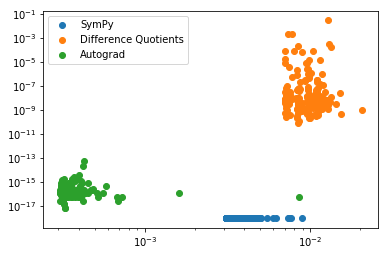

In [50]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(s_time, s_errors)
plt.scatter(d_time, d_errors)
plt.scatter(g_time, g_errors)
plt.legend(['SymPy', 'Difference Quotients', 'Autograd'])